In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
df_x = pd.read_csv('Features_X')
df_y = pd.read_csv('Y_labels')

In [18]:
df_y.drop(['Unnamed: 0'],axis=1, inplace = True)
df_x.drop(['Unnamed: 0'],axis=1, inplace = True)

In [19]:
X = pd.DataFrame.to_numpy(df_x)
Y = pd.DataFrame.to_numpy(df_y)

In [24]:
print(X.shape)
print(Y.shape)

(13493, 150)
(13493, 1)


In [26]:
clases = np.unique(Y)
print(clases)

[0. 1. 2. 3. 4.]


((9445, 150), (9445, 1), (4048, 150), (4048, 1))


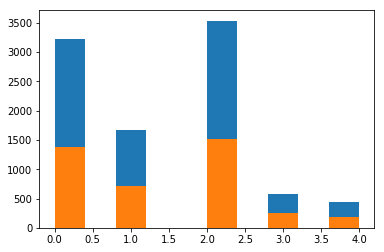

In [34]:
from sklearn.model_selection import train_test_split
SEED = 77
train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.30,
                                                      stratify=Y, random_state=SEED)

print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
plt.hist(train_y)
plt.hist(valid_y)
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf_logistic_regression = LogisticRegression()

In [39]:
clf_logistic_regression.fit(X=train_x,y=train_y)
y_pred = clf_logistic_regression.predict(valid_x)

/home/andresqb198/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andresqb198/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andresqb198/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [41]:
def error_logistic(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    error = error/np.size(Y)
    
    return error

In [42]:
error_logistic(Y_lest=y_pred,Y=valid_y)

0

In [52]:
errores = 0
j = 0
for i in range(len(valid_y)):
    if valid_y[i] == y_pred[i]:
        errores += 1
    j += 1

tot_err = float(errores)/float(j)
print('Errores: ' + str(tot_err))


Errores: 0.38290513834


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_true=valid_y,y_pred=y_pred)

array([[ 513,    0,  866,    0,    0],
       [ 262,    0,  453,    0,    0],
       [ 478,    0, 1037,    0,    0],
       [  70,    0,  179,    0,    0],
       [  41,    0,  149,    0,    0]])